In [7]:
import torch
import torchvision
import matplotlib.pyplot as plt

In [3]:
%cd /home/x_amime/x_amime/projects/kernel-view-to-explainability

/proj/azizpour-group/users/x_amime/projects/kernel-view-to-explainability


/home/x_amime/x_amime/envs/torch-env/lib/python3.10/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [4]:
# download imagenette dataset

data_path = '/proj/azizpour-group/datasets/imagenette2'

augmentations = torchvision.transforms.ToTensor(),
train_dataset= torchvision.datasets.ImageFolder(data_path, transform=torchvision.transforms.Compose(augmentations))
val_dataset = torchvision.datasets.ImageFolder(data_path, transform=torchvision.transforms.Compose(augmentations))

In [5]:
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=1, shuffle=False)
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=1, shuffle=False)

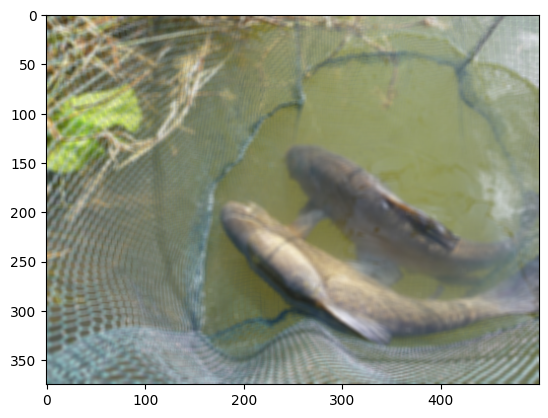

In [24]:
x = next(iter(train_loader))[0]
x = torchvision.transforms.GaussianBlur(5, sigma=(5.0)).forward(x)
plt.imshow(x[0].permute(1, 2, 0).numpy())

In [2]:
%cd /home/x_amime/x_amime/projects/kernel-view-to-explainability

/proj/azizpour-group/users/x_amime/projects/kernel-view-to-explainability


/home/x_amime/x_amime/envs/torch-env/lib/python3.10/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [12]:
from src.datasets import get_imagenette_dataset
from src.utils import AugmentationSwitch, DatasetSwitch
from src import paths as local_pathlib

train_dataset, test_dataset = get_imagenette_dataset(
    local_pathlib.get_local_data_dir(DatasetSwitch.IMAGENETTE),
    224,
    augmentation=AugmentationSwitch.TRAIN,
    gaussian_noise_var=0.5,
    gaussian_blur_var=0,
)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-4.016509..3.6060767].


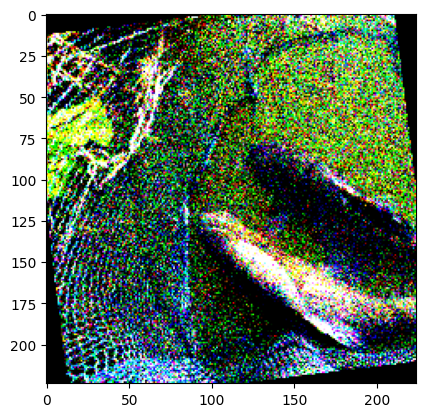

In [16]:
import matplotlib.pyplot as plt
x = train_dataset[0][0]
plt.imshow(x.permute(1, 2, 0).numpy())